In [31]:
#!pip3 install xlrd
#!pip3 install numpy scipy matplotlib ipython jupyter pandas sympy nose seaborn
#!pip install ipympl

     |████████████████████████████████| 55.6 MB 20.0 MB/s            
     |████████████████████████████████| 6.2 MB 25.8 MB/s            
     |████████████████████████████████| 154 kB 33.4 MB/s            
     |████████████████████████████████| 292 kB 26.6 MB/s            
     |████████████████████████████████| 121 kB 16.8 MB/s            
     |████████████████████████████████| 120 kB 18.4 MB/s            
     |████████████████████████████████| 532 kB 17.9 MB/s            
     |████████████████████████████████| 1.6 MB 2.3 MB/s            
     |████████████████████████████████| 243 kB 37.4 MB/s            
     |████████████████████████████████| 65 kB 7.9 MB/s             
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [230]:
import pandas as pd
import datetime 
import math
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

sns.set() #sns.reset_orig()
%matplotlib inline

c_path = 'Coefs.csv'
c_df = pd.read_csv(c_path) 

p_path = 'Palmares.csv'
p_df = pd.read_csv(p_path).fillna(0)   

p_df['UCL']= p_df['UCL'].astype(int)
p_df['WC']= p_df['WC'].astype(int)
p_df['EC']= p_df['EC'].astype(int)
p_df['AFC']= p_df['AFC'].astype(int)
p_df['SAC']= p_df['SAC'].astype(int)
p_df['ASC']= p_df['ASC'].astype(int)

p_df['Score']= 1.5  * (c_df.loc[0,'UCL'] * p_df['UCL'] + c_df.loc[0,'WC'] * p_df['WC'] + c_df.loc[0,'EC'] * p_df['EC'] + c_df.loc[0,'SAC'] * p_df['SAC'] + c_df.loc[0,'AFC'] * p_df['AFC'] ) 
 
    
p_df['BDC']  = pd.to_datetime(p_df['BD'],infer_datetime_format=True)  - datetime.datetime.now() 

p_df = p_df[p_df['Score'] > 0]


p_df['Prom'] =  (1.499 * p_df['Score'] - 2.27811  * (p_df['BDC'].dt.days/365) )/ (p_df['BDC'].dt.days/3650 * p_df['BDC'].dt.days/3650) * 5


## Palyers Ranking

de = p_df.sort_values (by=['Prom','BDC'], ascending=False) # sorting on 'Score' first, then on 'Age' 

#p_df_M ['Order'] = p_df_M['Score'].rank(ascending=False,method='first').astype(int)

de['Age'] = -de ['BDC'].dt.days /365#.apply(lambda x: round(x, 2))#.astype(int) # age in days   

pd.options.display.float_format = '{:,.2f}'.format

de = de[['Player','Club','Prom','Age'] ]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
# print(de.to_string(index=False))

de.index = np.arange(1, len(de)+1)
de.head(33)



,Player,Club,Prom,Age
1,R. VARANE,MU,68.01,29.20
2,E. CAMAVINGA,RM,67.99,20.40
3,CASEMIRO,RM,67.36,30.37
4,M. KOVACIC,CHE,65.93,28.17
5,ISCO,RM,65.41,30.21
6,M. ASENSIO,RM,64.73,26.46
7,D. CARVAJAL,RM,64.57,30.49
8,RODRYGO,RM,63.97,21.49
9,C. HUDSON-ODOI,CHE,63.37,21.66
10,A. DAVIES,BYM,63.32,21.67


In [231]:
# Vizualization

#df10 = pd.DataFrame(de.head(10))
#ax = df10.plot.bar(x='Player',y='Score')  

de.set_index('Player', inplace=True)
#dee = de.head(10).iloc[::-1]




dee = de

dee

,Club,Prom,Age
Player,,,
R. VARANE,MU,68.01,29.20
E. CAMAVINGA,RM,67.99,20.40
CASEMIRO,RM,67.36,30.37
M. KOVACIC,CHE,65.93,28.17
ISCO,RM,65.41,30.21
...,...,...,...
E. CAVANI,MU,33.97,35.40
S. MANDANDA,OM,33.78,37.28
G. CHIELLINI,JUV,32.40,37.90


In [232]:
## Teams Ranking

de_f = dee.groupby('Club').agg({"Prom":'mean',"Age":'mean' }).sort_values (by='Prom', ascending=False).reset_index().sort_values([ "Prom","Age"], ascending = (False,True))

de_ff = de_f.head(10)
de_ff

,Club,Prom,Age
0,RM,58.21,28.35
1,CHE,49.90,28.04
2,BYM,48.54,29.10
3,FCB,47.63,32.04
4,MU,47.18,32.30
5,LIV,46.35,29.15
6,PSG,46.23,29.72
7,OM,45.92,27.67
8,TOT,45.27,28.88
9,OL,45.23,29.64


In [233]:
de_ff['Mean Age'] = de_ff['Age'].apply(lambda x: round(x, 2))

de_ff = de_ff [['Club','Prom','Mean Age']]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
 #print(de.to_string(index=False))

de_ff.index = np.arange(1, len(de_ff)+1)
de_ff

,Club,Prom,Mean Age
1,RM,58.21,28.35
2,CHE,49.90,28.04
3,BYM,48.54,29.10
4,FCB,47.63,32.04
5,MU,47.18,32.30
6,LIV,46.35,29.15
7,PSG,46.23,29.72
8,OM,45.92,27.67
9,TOT,45.27,28.88
10,OL,45.23,29.64


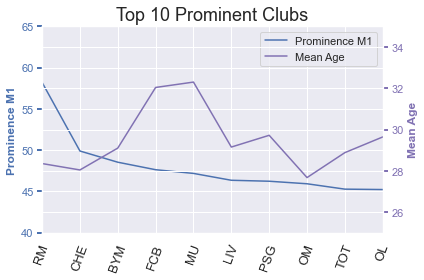

In [276]:
fig, ax = plt.subplots()


fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()

p1, = ax.plot(de_ff['Club'], de_ff['Prom'], "b-", label="Prominence " + c_df.loc[0,'Model'])
p2, = twin1.plot(de_ff['Club'], de_ff['Mean Age'], "m-", label="Mean Age")

ax.set_xlim(de_ff['Club'].iloc[0],de_ff['Club'].iloc[9]) 

ax.set_ylim(40, 65)
twin1.set_ylim(25, 35)


ax.set_ylabel("Prominence "+ c_df.loc[0,'Model'], fontweight='bold' )
twin1.set_ylabel("Mean Age", fontweight='bold')




ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=5, width=2)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax.tick_params(axis='x', rotation=70,  which='major', labelsize=13)

ax.legend(handles=[p1, p2])

ax.set_title('Top 10 Prominent Clubs', fontsize=18)
plt.tight_layout()

filename = 'Clubs_Prominence'

plt.savefig(c_df.loc[0,'Model']+'_'+filename+'.png', facecolor=(.94, .94, .94))
plt.show()